# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [65]:
# Dependencies and Setup
%matplotlib widget
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 617


In [3]:
sample_response = requests.get("https://api.openweathermap.org/data/2.5/weather?q=London,uk&APPID=42206b4655510f0430f9fa490554978c")
sample_response

<Response [200]>

In [4]:
#Testing url
base_url = "https://api.openweathermap.org/data/2.5/weather?"
city_test = "London"
cityurl = city_url = base_url + "appid=" + weather_api_key + "&q=" + city_test
cityurl

##city_weather1_response = requests.get(cityurl)
##city_weather1_json = city_weather1_response.json()
#city_weather1_json

##city_lat1 = city_weather1_response.json()["coord"]["lat"]
#city_lat1

'https://api.openweathermap.org/data/2.5/weather?appid=42206b4655510f0430f9fa490554978c&q=London'

In [66]:
sample1_response = requests.get(cityurl)
sample1_response

<Response [200]>

In [5]:
city_weather_response1 = requests.get(cityurl)
#city_weather1_json = city_weather_response1.json()["main"]["temp_max"]
city_weather1_json = city_weather_response1.json()

(city_weather1_json)["weather"][0]["description"]


'scattered clouds'

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
base_url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = base_url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        #city_weather = # YOUR CODE HERE
        city_weather_response = requests.get(city_url)
        city_weather_json = city_weather_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather_response.json()["coord"]["lat"]
        city_lng = city_weather_response.json()["coord"]["lon"]
        city_max_temp = city_weather_response.json()["main"]["temp_max"]
        city_humidity = city_weather_response.json()["main"]["humidity"]
        city_clouds = city_weather_response.json()["weather"][0]["description"]
        city_wind = city_weather_response.json()["wind"]["speed"]
        city_country = city_weather_response.json()["sys"]["country"]
        city_date = city_weather_response.json()["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | batticaloa
Processing Record 2 of Set 1 | usinsk
Processing Record 3 of Set 1 | dikson
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | new norfolk
Processing Record 6 of Set 1 | yaransk
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | atuona
Processing Record 9 of Set 1 | jamestown
Processing Record 10 of Set 1 | port alfred
Processing Record 11 of Set 1 | awjilah
Processing Record 12 of Set 1 | seoul
Processing Record 13 of Set 1 | mehamn
Processing Record 14 of Set 1 | ulladulla
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | komsomolskiy
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 19 of Set 1 | yar-sale
Processing Record 20 of Set 1 | hilo
Processing Record 21 of Set 1 | vaini
Processing Record 22 of Set 1 | cape town
Processing Rec

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_records(city_data)
city_data_df


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,batticaloa,7.7102,81.6924,296.00,86,clear sky,5.24,LK,1668978301
1,usinsk,65.9939,57.5281,273.58,98,light snow,7.76,RU,1668978014
2,dikson,73.5069,80.5464,244.84,95,few clouds,3.68,RU,1668978302
3,rikitea,-23.1203,-134.9692,292.76,86,moderate rain,5.88,PF,1668978303
4,new norfolk,-42.7826,147.0587,282.55,67,few clouds,2.68,AU,1668978304
...,...,...,...,...,...,...,...,...,...
557,alice springs,-23.7000,133.8833,289.90,77,overcast clouds,0.00,AU,1668978692
558,the pas,53.8251,-101.2541,268.75,86,overcast clouds,4.72,CA,1668978692
559,borogontsy,62.6683,131.1683,237.47,100,broken clouds,0.98,RU,1668978693
560,bor,56.3567,44.0669,266.11,96,overcast clouds,0.23,RU,1668978694


In [9]:
# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [10]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,batticaloa,7.7102,81.6924,296.00,86,clear sky,5.24,LK,1668978301
1,usinsk,65.9939,57.5281,273.58,98,light snow,7.76,RU,1668978014
2,dikson,73.5069,80.5464,244.84,95,few clouds,3.68,RU,1668978302
3,rikitea,-23.1203,-134.9692,292.76,86,moderate rain,5.88,PF,1668978303
4,new norfolk,-42.7826,147.0587,282.55,67,few clouds,2.68,AU,1668978304


In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,batticaloa,7.7102,81.6924,296.00,86,clear sky,5.24,LK,1668978301
1,usinsk,65.9939,57.5281,273.58,98,light snow,7.76,RU,1668978014
2,dikson,73.5069,80.5464,244.84,95,few clouds,3.68,RU,1668978302
3,rikitea,-23.1203,-134.9692,292.76,86,moderate rain,5.88,PF,1668978303
4,new norfolk,-42.7826,147.0587,282.55,67,few clouds,2.68,AU,1668978304


In [ ]:
city_data

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

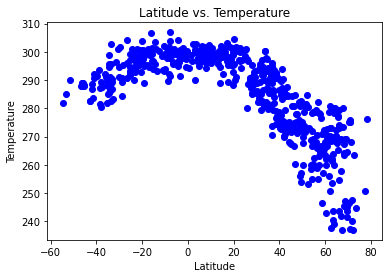

In [69]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
%matplotlib inline
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]
plt.scatter(x_values, y_values, color="blue")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Latitude vs. Temperature")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

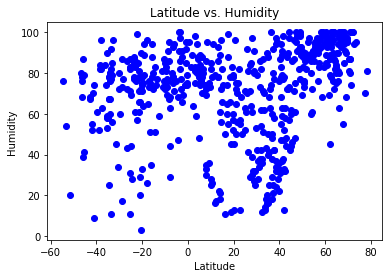

In [63]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
%matplotlib inline
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]
plt.scatter(x_values, y_values, color="blue")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity")

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

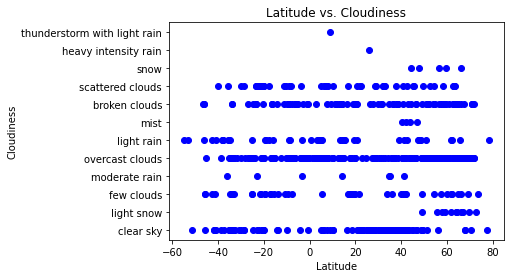

In [62]:
# Build the scatter plots for latitude vs. cloudiness
%matplotlib inline
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]
plt.scatter(x_values, y_values, color="blue")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

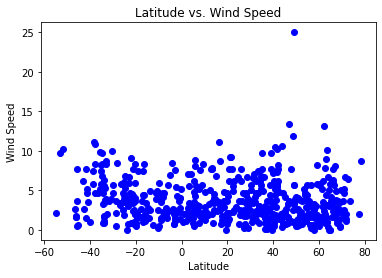

In [61]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
%matplotlib inline
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]
plt.scatter(x_values, y_values, color="blue")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Latitude vs. Wind Speed")


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [42]:
city_data_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,batticaloa,7.7102,81.6924,296.00,86,clear sky,5.24,LK,1668978301
1,usinsk,65.9939,57.5281,273.58,98,light snow,7.76,RU,1668978014
2,dikson,73.5069,80.5464,244.84,95,few clouds,3.68,RU,1668978302
3,rikitea,-23.1203,-134.9692,292.76,86,moderate rain,5.88,PF,1668978303
4,new norfolk,-42.7826,147.0587,282.55,67,few clouds,2.68,AU,1668978304
...,...,...,...,...,...,...,...,...,...
557,alice springs,-23.7000,133.8833,289.90,77,overcast clouds,0.00,AU,1668978692
558,the pas,53.8251,-101.2541,268.75,86,overcast clouds,4.72,CA,1668978692
559,borogontsy,62.6683,131.1683,237.47,100,broken clouds,0.98,RU,1668978693


In [44]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"] >= 0])

# Display sample data
northern_hemi_df.tail()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
554,mabaruma,8.2000,-59.7833,297.40,95,scattered clouds,2.06,GY,1668978690
555,kijang,35.2442,129.2139,286.52,68,clear sky,2.40,KR,1668978690
558,the pas,53.8251,-101.2541,268.75,86,overcast clouds,4.72,CA,1668978692
559,borogontsy,62.6683,131.1683,237.47,100,broken clouds,0.98,RU,1668978693
560,bor,56.3567,44.0669,266.11,96,overcast clouds,0.23,RU,1668978694


In [45]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = pd.DataFrame(city_data_df.loc[city_data_df["Lat"] < 0])

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,rikitea,-23.1203,-134.9692,292.76,86,moderate rain,5.88,PF,1668978303
4,new norfolk,-42.7826,147.0587,282.55,67,few clouds,2.68,AU,1668978304
6,ushuaia,-54.8000,-68.3000,281.73,76,light rain,2.12,AR,1668978026
7,atuona,-9.8000,-139.0333,298.49,73,clear sky,5.88,PF,1668978306
9,port alfred,-33.5906,26.8910,288.81,92,clear sky,3.80,ZA,1668978307


###  Temperature vs. Latitude Linear Regression Plot

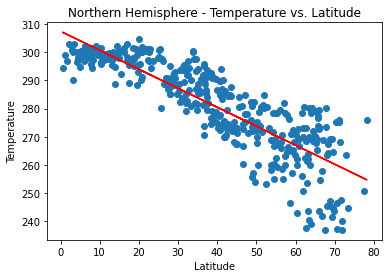

In [53]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
%matplotlib inline
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(5.8,0.8), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Northern Hemisphere - Temperature vs. Latitude")
plt.show()

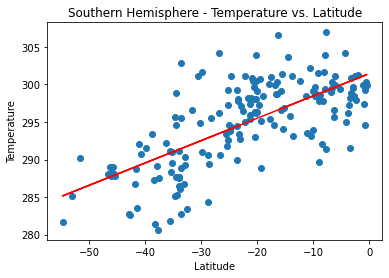

In [54]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
%matplotlib inline
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(5.8,0.8), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Temperature")
plt.title("Southern Hemisphere - Temperature vs. Latitude")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

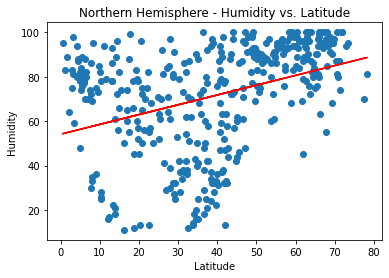

In [55]:
# Northern Hemisphere
# YOUR CODE HERE
%matplotlib inline
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(5.8,0.8), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Northern Hemisphere - Humidity vs. Latitude")
plt.show()

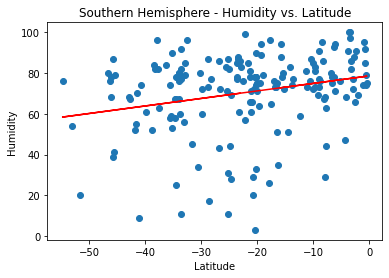

In [56]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(5.8,0.8), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Southern Hemisphere - Humidity vs. Latitude")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

In [ ]:
# Northern Hemisphere
# YOUR CODE HERE


In [ ]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

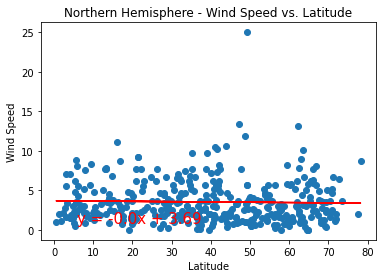

In [58]:
# Northern Hemisphere
# YOUR CODE HERE
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(5.8,0.8), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Northern Hemisphere - Wind Speed vs. Latitude")
plt.show()

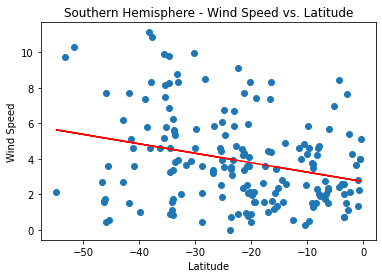

In [59]:
# Southern Hemisphere
# YOUR CODE HERE
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(5.8,0.8), fontsize=15, color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("Southern Hemisphere - Wind Speed vs. Latitude")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE